In [1]:
import pandas as pd
import glob
import os
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dropbox_dir = "C:/Users/cocoy/Dropbox (Palmer Lab)"
meta_dir = dropbox_dir + "/Suzanne_Mitchell_U01/Data-locomotor"


In [3]:
#Creating one dataframe with all locomotor files
#Must manually unzip all folders
#Must combine locomotor 5 files from T1&T2 and T3&T4 into one file named comprehensive_output_files
cohorts_dir = ['Shipment1_locomotor','Shipment2_locomotor','Shipment3_locomotor','Shipment4_locomotor',
              'Shipment5_locomotor','Shipment6_locomotor','ShipR_locomotor']
zip_folder = ['U01_Shipment1_Locomotor/comprehensive-output-files/','U01_Shipment2_Locomotor/S2-comprehensive-output-files/',
              'U01-Shipment3_Locomotor/S3-comprehensive-out-files/','comprehensive_output_files/comprehensive_output_files/',
              'comprehensive-output-files/','Ship6-comprehensive-output-files/S6-comprehensive-out-files/',
              'R-comprehensive-output-files/R-comprehensive-output-files/']
dir_dict = {cohorts_dir[i]: zip_folder[i] for i in range(len(cohorts_dir))}
count = 0
df_excel = pd.DataFrame()
df_csv = pd.DataFrame()
for cohort_dir,zip_folder in dir_dict.items():
        #for cohort in cohort_list:
        raw_dir = meta_dir + "/" + cohort_dir + "/" + zip_folder
        os.chdir(raw_dir)
        for file in os.listdir(raw_dir):
            if file.endswith('.xlsx'):
                df_excel = df_excel.append(pd.read_excel(file), ignore_index=True)
            elif file.endswith('.csv'):
                count += 1
                df_csv = df_csv.append(pd.read_csv(file, skiprows = 58), ignore_index=True)

                
df_csv
print(count)

372


In [4]:
def format_df_csv():
    #make column headers uniform
    df_csv.columns = df_csv.columns.str.replace(':','')
    df_csv.columns = df_csv.columns.str.replace(' ','_')
    df_csv.columns = df_csv.columns.str.lower()
    
    df_csv.rename(columns={'subject_id':'rfid','duration_(s)':'duration','total_distance_(cm)':'total_distance',
                           'total_distance_x-axis_(cm)':'total_distance_x','total_distance_y-axis_(cm)':
                           'total_distance_y','rest_time_(s)':'rest_time','movement_time_(s)':'movement_time',
                           'ambulatory_time_(s)':'ambulatory_time','stereotypy_time_(s)':'stereotypy_time',
                           'vertical_activity_time_(s)':'vertical_activity_time','ambulatory_episode_average_velocity_(cm/s)':
                           'ambulatory_episode_average_velocity','ambulatory_episode_peak_average_velocity_(cm/s)':
                           'ambulatory_episode_peak_average_velocity','ambulatory_episode_median_velocity_(cm/s)':
                           'ambulatory_episode_median_velocity','left-front_time_legacy_(s)':'left-front_time_legacy',
                           'right-front_time_legacy_(s)':'right_front_time_legacy','counter-clockwise_revolutions':
                           'counter_clockwise_revolutions','left-rear_time_legacy_(s)':'left_rear_time_legacy',
                           'right-rear_time_legacy_(s)':'right_rear_time_legacy','margin_time_legacy_(s)':
                           'margin_time_legacy','center_time_legacy_(s)':'center_time_legacy','margin_distance_legacy_(cm)':
                           'margin_distance_legacy','center_distance_legacy_(cm)':'center_distance_legacy'},inplace = True)
    
    #Remove uneccesary columns
    #Below: column header(only value contained in column)
    #subject_sex(unknown), subject_treatment(NaN),unnamed_44(NaN),batch(batch 1), duration(60)
    df_csv.drop(['subject_sex', 'subject_treatment','unnamed_44','batch','duration'], axis=1, inplace = True)
    

        
        

format_df_csv()
df_csv

,experiment,cage,rfid,subject_type,subject_age,phase,sample,start_time,total_distance,total_distance_x,...,ambulatory_episode_peak_average_velocity,ambulatory_episode_median_velocity,left-front_time_legacy,right_front_time_legacy,left_rear_time_legacy,right_rear_time_legacy,margin_time_legacy,center_time_legacy,margin_distance_legacy,center_distance_legacy
0,U01-t1-gp10,Cage 1,45897,19-black,11,Phase 1,1,4:02:56 PM,225.06,130.60,...,26.48,17.66,9.76,0.05,2.74,3.42,57.45,2.55,176.09,48.97
1,U01-t1-gp10,Cage 1,45897,19-black,11,Phase 1,2,4:03:56 PM,188.21,81.60,...,20.57,30.35,3.02,3.47,1.14,16.56,59.75,0.25,183.65,4.56
2,U01-t1-gp10,Cage 1,45897,19-black,11,Phase 1,3,4:04:56 PM,226.97,47.31,...,28.80,16.24,0.00,2.31,0.00,18.63,55.84,4.16,169.19,57.78
3,U01-t1-gp10,Cage 1,45897,19-black,11,Phase 1,4,4:05:56 PM,203.53,53.98,...,24.56,18.78,0.02,4.98,0.44,33.64,49.24,10.76,102.59,100.93
4,U01-t1-gp10,Cage 1,45897,19-black,11,Phase 1,5,4:06:56 PM,292.87,148.59,...,22.30,13.25,3.99,0.62,1.16,6.94,56.33,3.67,251.16,41.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22030,U01-t2-gp35,Cage 2,24878,4-mixed/black,12,NaN,11,1:32:21 PM,5.60,1.59,...,11.83,4.05,0.00,0.00,0.00,6.41,60.00,0.00,5.60,0.00
22031,U01-t2-gp35,Cage 2,24878,4-mixed/black,12,NaN,12,1:33:21 PM,235.50,87.00,...,24.27,14.80,3.63,0.00,0.66,4.39,50.10,9.91,145.75,89.74
22032,U01-t2-gp35,Cage 2,24878,4-mixed/black,12,NaN,13,1:34:21 PM,42.44,12.07,...,16.79,11.46,0.00,0.00,32.37,0.00,55.72,4.28,39.24,3.19
22033,U01-t2-gp35,Cage 2,24878,4-mixed/black,12,NaN,14,1:35:21 PM,123.64,63.82,...,25.44,5.97,0.00,4.75,0.05,2.02,50.34,9.66,68.23,55.41


In [ ]:
#df_csv.to_csv(r'C:\Users\cocoy\Dropbox (Palmer Lab)\Palmer Lab\Shae Ziegler\Suzanne_Mitchell_U01\locomotor.csv', index=False)

In [5]:
#Use after running QC vs locomotor to get cohort
df_csv = pd.read_csv(r'C:\Users\cocoy\Dropbox (Palmer Lab)\Palmer Lab\Shae Ziegler\Suzanne_Mitchell_U01\locomotor.csv')

In [6]:
def correcting_rfid(df_csv):
    #change rfid to unclude all 15 digits
    #C01-C04 9330003200 else 9330003201
    cohort_list_1 = ['C01','C02','C03','C04']
    cohort_list_2 = ['C05','C06','C07']
    for i in cohort_list_1:
        df_csv.loc[(df_csv.cohort == i),'rfid']= '9330003200' + df_csv['rfid'].astype(str)
    for i in cohort_list_2:
        df_csv.loc[(df_csv.cohort == i),'rfid']= '9330003201' + df_csv['rfid'].astype(str)
correcting_rfid(df_csv)
df_csv

,experiment,cage,rfid,subject_type,subject_age,phase,sample,start_time,total_distance,total_distance_x,...,ambulatory_episode_median_velocity,left-front_time_legacy,right_front_time_legacy,left_rear_time_legacy,right_rear_time_legacy,margin_time_legacy,center_time_legacy,margin_distance_legacy,center_distance_legacy,cohort
0,U01-t1-gp10,Cage 1,933000320045897,19-black,11,Phase 1,1,4:02:56 PM,225.06,130.60,...,17.66,9.76,0.05,2.74,3.42,57.45,2.55,176.09,48.97,C01
1,U01-t1-gp10,Cage 1,933000320045897,19-black,11,Phase 1,2,4:03:56 PM,188.21,81.60,...,30.35,3.02,3.47,1.14,16.56,59.75,0.25,183.65,4.56,C01
2,U01-t1-gp10,Cage 1,933000320045897,19-black,11,Phase 1,3,4:04:56 PM,226.97,47.31,...,16.24,0.00,2.31,0.00,18.63,55.84,4.16,169.19,57.78,C01
3,U01-t1-gp10,Cage 1,933000320045897,19-black,11,Phase 1,4,4:05:56 PM,203.53,53.98,...,18.78,0.02,4.98,0.44,33.64,49.24,10.76,102.59,100.93,C01
4,U01-t1-gp10,Cage 1,933000320045897,19-black,11,Phase 1,5,4:06:56 PM,292.87,148.59,...,13.25,3.99,0.62,1.16,6.94,56.33,3.67,251.16,41.70,C01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22030,U01-t2-gp35,Cage 2,933000320124878,4-mixed/black,12,NaN,11,1:32:21 PM,5.60,1.59,...,4.05,0.00,0.00,0.00,6.41,60.00,0.00,5.60,0.00,C07
22031,U01-t2-gp35,Cage 2,933000320124878,4-mixed/black,12,NaN,12,1:33:21 PM,235.50,87.00,...,14.80,3.63,0.00,0.66,4.39,50.10,9.91,145.75,89.74,C07
22032,U01-t2-gp35,Cage 2,933000320124878,4-mixed/black,12,NaN,13,1:34:21 PM,42.44,12.07,...,11.46,0.00,0.00,32.37,0.00,55.72,4.28,39.24,3.19,C07
22033,U01-t2-gp35,Cage 2,933000320124878,4-mixed/black,12,NaN,14,1:35:21 PM,123.64,63.82,...,5.97,0.00,4.75,0.05,2.02,50.34,9.66,68.23,55.41,C07


In [7]:
#All error corrections

#Correct 4 file experiment names. 
#'U01-t2-gp21', 'U01-t2-gp22' to 'U01-t1-gp21', 'U01-t1-gp22'
#'U01-t2a-gp21', 'U01-t2a-gp22' to 'U01-t2-gp21', 'U01-t2-gp22'
def correct_experiment(df):
    old_name = ['U01-t2-gp21', 'U01-t2-gp22','U01-t2a-gp21', 'U01-t2a-gp22']
    new_name = ['U01-t1-gp21', 'U01-t1-gp22','U01-t2-gp21', 'U01-t2-gp22']
    for name in old_name: 
        index = old_name.index(name)
        df.loc[(df.experiment == name) & (df.cohort == 'C05'),'experiment'] = new_name[index]

#87713 is in C05 but cannot be found in wfu_master
#87713 is a typo and should be 87173
#missing_cohort = locomotor_all[locomotor_all['cohort'].isna()]
#locomotor_all[locomotor_all['rfid'] == '933000320187173']
def fix_rfid(df):
    df['rfid'] = df['rfid'].astype(str)
    df.loc[(df.rfid == '87713'),'rfid'] = '933000320187173'
    df.loc[(df.rfid == '933000320187173'),'cohort'] = 'C05'

#need to remove 933000320046763 from file U01-t2-gp13; rat had tail injury in first file
#file U01-t2-gp13-B contains the correct data for rat
#will remove 15 rows from table
def remove_incorrect(df):
    df.drop(df.loc[(df.experiment == 'U01-t2-gp13') & (df.rfid == '933000320046763')].index, inplace = True)
    df.loc[(df.experiment == 'U01-t2-gp13-B'),'experiment'] = 'U01-t2-gp13'
    
#There is no U01-t1-gp2 in C05. Assume U01-t1-gp2a is its replacement
def file_rename(df):
    df.loc[(df.experiment == 'U01-t1-gp2a'),'experiment'] = 'U01-t1-gp2'
    #extra_file = locomotor_all[locomotor_all['experiment'] == 'U01-t1-gp2a']
    
remove_incorrect(df_csv)
fix_rfid(df_csv)
correct_experiment(df_csv)
file_rename(df_csv)


In [8]:
def splitting_cells(df):
    df['cage'] = df['cage'].str.replace('Cage ','')
    #df['phase'] = df['phase'].str.replace('Phase ','')
    #split cell based on -
    df['U01'] = df.experiment.str.split('-', expand = True)[0]
    df['time'] = df.experiment.str.split('-', expand = True)[1]
    df['file_num'] = df.experiment.str.split('-', expand = True)[2]

splitting_cells(df_csv)
#print(df_csv.columns)

In [17]:
def format_for_calc(df_csv):
    #drop uneeded columns for calc
    df = df_csv.drop(['U01','subject_type','subject_age','phase','start_time'], axis=1)
    #reorganize columns
    df = df[['experiment', 'rfid','cohort', 'time',
       'file_num', 'sample','cage', 'total_distance', 'total_distance_x',
       'total_distance_y', 'horizontal_activity_count',
       'ambulatory_activity_count', 'rest_time', 'rest_episode_count',
       'movement_time', 'movement_episode_count', 'ambulatory_time',
       'ambulatory_episode_count', 'stereotypy_time',
       'stereotypic_episode_count', 'stereotypic_activity_count',
       'stereotypic_episode_activity_count', 'vertical_episode_count',
       'vertical_activity_count', 'vertical_activity_time', 'jump_count',
       'clockwise_revolutions', 'counter_clockwise_revolutions',
       'ambulatory_episode_average_velocity',
       'ambulatory_episode_peak_average_velocity',
       'ambulatory_episode_median_velocity', 'left-front_time_legacy',
       'right_front_time_legacy', 'left_rear_time_legacy',
       'right_rear_time_legacy', 'margin_time_legacy', 'center_time_legacy',
       'margin_distance_legacy', 'center_distance_legacy']]
    #Drop rows that will not be used for calculations: C07, C06, t3, t4 according to Mitchell
    df.drop(df.loc[df['cohort']=='C07'].index, inplace=True)
    df.drop(df.loc[df['cohort']=='C06'].index, inplace=True)
    df.drop(df.loc[df['time']=='t3'].index, inplace=True)
    df.drop(df.loc[df['time']=='t4'].index, inplace=True)

    return df


locomotor_all = format_for_calc(df_csv)

In [ ]:
#need to find where cohort 1 file U01-t2-gp6 is

In [18]:
locomotor_all

,experiment,rfid,cohort,time,file_num,sample,cage,total_distance,total_distance_x,total_distance_y,...,ambulatory_episode_peak_average_velocity,ambulatory_episode_median_velocity,left-front_time_legacy,right_front_time_legacy,left_rear_time_legacy,right_rear_time_legacy,margin_time_legacy,center_time_legacy,margin_distance_legacy,center_distance_legacy
0,U01-t1-gp10,933000320045897,C01,t1,gp10,1,1,225.06,130.60,27.94,...,26.48,17.66,9.76,0.05,2.74,3.42,57.45,2.55,176.09,48.97
1,U01-t1-gp10,933000320045897,C01,t1,gp10,2,1,188.21,81.60,64.14,...,20.57,30.35,3.02,3.47,1.14,16.56,59.75,0.25,183.65,4.56
2,U01-t1-gp10,933000320045897,C01,t1,gp10,3,1,226.97,47.31,125.10,...,28.80,16.24,0.00,2.31,0.00,18.63,55.84,4.16,169.19,57.78
3,U01-t1-gp10,933000320045897,C01,t1,gp10,4,1,203.53,53.98,108.59,...,24.56,18.78,0.02,4.98,0.44,33.64,49.24,10.76,102.59,100.93
4,U01-t1-gp10,933000320045897,C01,t1,gp10,5,1,292.87,148.59,91.44,...,22.30,13.25,3.99,0.62,1.16,6.94,56.33,3.67,251.16,41.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14950,U01-t2-gp22,933000320187131,C05,t2,gp22,11,4,1.90,0.00,0.00,...,7.00,6.31,0.00,0.00,0.00,0.00,60.00,0.00,1.90,0.00
14951,U01-t2-gp22,933000320187131,C05,t2,gp22,12,4,0.90,0.00,0.00,...,9.76,3.07,0.00,0.00,0.00,0.00,60.00,0.00,0.90,0.00
14952,U01-t2-gp22,933000320187131,C05,t2,gp22,13,4,0.00,0.00,0.00,...,1.55,1.55,0.00,0.00,0.00,0.00,60.00,0.00,0.00,0.00
14953,U01-t2-gp22,933000320187131,C05,t2,gp22,14,4,0.90,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,60.00,0.00,0.90,0.00


In [11]:
#df_csv.cohort.unique()
locomotor_all['cohort'].value_counts()

C02    3300
C03    3000
C04    3000
C05    3000
C01    2640
Name: cohort, dtype: int64

In [12]:
locomotor_all['rfid'].value_counts()

933000320045897    30
933000320047543    30
933000320047960    30
933000320047374    30
933000320047698    30
                   ..
933000320187131    30
933000320046057    15
933000320045899    15
933000320045886    15
933000320046055    15
Name: rfid, Length: 500, dtype: int64

In [13]:
locomotor_all['experiment'].value_counts()

U01-t1-gp10    300
U01-t2-gp10    300
U01-t2-gp12    300
U01-t2-gp13    300
U01-t2-gp14    300
U01-t1-gp11    300
U01-t2-gp16    300
U01-t2-gp17    300
U01-t2-gp18    300
U01-t2-gp19    300
U01-t2-gp1     300
U01-t2-gp20    300
U01-t2-gp21    300
U01-t2-gp22    300
U01-t2-gp2     300
U01-t2-gp3     300
U01-t2-gp4     300
U01-t2-gp5     300
U01-t2-gp7     300
U01-t2-gp8     300
U01-t2-gp9     300
U01-t2-gp11    300
U01-t2-gp15    300
U01-t1-gp9     300
U01-t1-gp20    300
U01-t1-gp12    300
U01-t1-gp13    300
U01-t1-gp14    300
U01-t1-gp15    300
U01-t1-gp16    300
U01-t1-gp8     300
U01-t1-gp18    300
U01-t1-gp19    300
U01-t1-gp1     300
U01-t1-gp17    300
U01-t1-gp21    300
U01-t1-gp2     300
U01-t1-gp3     300
U01-t1-gp4     300
U01-t1-gp5     300
U01-t1-gp6     300
U01-t1-gp7     300
U01-t1-gp22    300
U01-t2-gp23    270
U01-t1-gp23    270
U01-t2-gp24    240
U01-t2-gp25    240
U01-t1-gp24    240
U01-t1-gp25    240
U01-t2-gp6     240
U01-t1-gp27     60
U01-t1-gp26     60
U01-t2-gp26 

In [14]:
locomotor_all['time'].value_counts()
#U01-t2a-gp21', 'U01-t2a-gp22

t1    7500
t2    7440
Name: time, dtype: int64

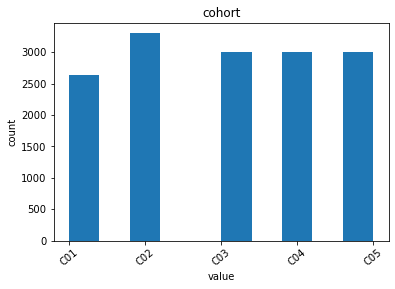

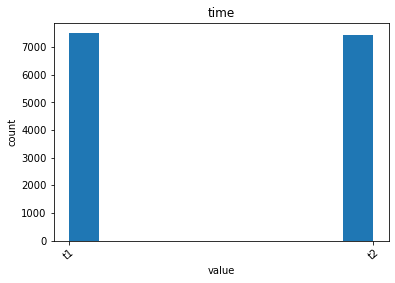

In [15]:
graph_columns = ['cohort','time']
for col in graph_columns:
    plt.title(col)
    plt.xlabel('value')
    plt.ylabel('count')
    plt.xticks(rotation = 40)
    plt.hist(locomotor_all[col].dropna())
    plt.show() 

In [19]:
#need to calculate total for each rfid at each time
df_groups = locomotor_all.groupby(['experiment', 'rfid','cohort','time','file_num','cage'])[['sample', 'total_distance_x', 'total_distance_y',
       'horizontal_activity_count', 'ambulatory_activity_count', 'rest_time',
       'rest_episode_count', 'movement_time', 'movement_episode_count',
       'ambulatory_time', 'ambulatory_episode_count', 'stereotypy_time',
       'stereotypic_episode_count', 'stereotypic_activity_count',
       'stereotypic_episode_activity_count', 'vertical_episode_count',
       'vertical_activity_count', 'vertical_activity_time', 'jump_count',
       'clockwise_revolutions', 'counter_clockwise_revolutions',
       'ambulatory_episode_average_velocity',
       'ambulatory_episode_peak_average_velocity',
       'ambulatory_episode_median_velocity', 'left-front_time_legacy',
       'right_front_time_legacy', 'left_rear_time_legacy',
       'right_rear_time_legacy', 'margin_time_legacy', 'center_time_legacy',
       'margin_distance_legacy', 'center_distance_legacy']].sum()
#print(locomotor_all.columns)
df_groups

sample  \
experiment rfid            cohort time file_num cage           
U01-t1-gp1 933000320045924 C01    t1   gp1      3        120   
           933000320046045 C02    t1   gp1      2        120   
           933000320046058 C01    t1   gp1      1        120   
           933000320046067 C01    t1   gp1      2        120   
           933000320046282 C01    t1   gp1      4        120   
...                                                      ...   
U01-t2-gp9 933000320047696 C04    t2   gp9      4        120   
           933000320187097 C05    t2   gp9      1        120   
           933000320187155 C05    t2   gp9      2        120   
           933000320187194 C05    t2   gp9      3        120   
           933000320187261 C05    t2   gp9      4        120   

                                                      total_distance_x  \
experiment rfid            cohort time file_num cage                     
U01-t1-gp1 933000320045924 C01    t1   gp1      3               430.86   
           933000320046045 C02    t1   gp1      2              1109.68   
           933000320046058 C01    t1   gp1      1               569.60   
           933000320046067 C01    t1   gp1      2               618.80   
           933000320046282 C01    t1   gp1      4               695.67   
...                                                                ...   
U01-t2-gp9 933000320047696 C04    t2   gp9      4              1233.80   
           933000320187097 C05    t2   gp9      1              1578.30   
           933000320187155 C05    t2   gp9      2               823.30   
           933000320187194 C05    t2   gp9      3              1402.12   
           933000320187261 C05    t2   gp9      4              1158.57   

                                                      total_distance_y  \
experiment rfid            cohort time file_num cage                     
U01-t1-gp1 933000320045924 C01    t1   gp1      3               468.96   
           933000320046045 C02    t1   gp1      2              1270.98   
           933000320046058 C01    t1   gp1      1               393.08   
           933000320046067 C01    t1   gp1      2               887.75   
           933000320046282 C01    t1   gp1      4               538.81   
...                                                                ...   
U01-t2-gp9 933000320047696 C04    t2   gp9      4              1009.36   
           933000320187097 C05    t2   gp9      1              1335.11   
           933000320187155 C05    t2   gp9      2               562.31   
           933000320187194 C05    t2   gp9      3              1163.00   
           933000320187261 C05    t2   gp9      4              1244.94   

                                                      horizontal_activity_count  \
experiment rfid            cohort time file_num cage                              
U01-t1-gp1 933000320045924 C01    t1   gp1      3                          2428   
           933000320046045 C02    t1   gp1      2                          5250   
           933000320046058 C01    t1   gp1      1                          4209   
           933000320046067 C01    t1   gp1      2                          3748   
           933000320046282 C01    t1   gp1      4                          2972   
...                                                                         ...   
U01-t2-gp9 933000320047696 C04    t2   gp9      4                          5262   
           933000320187097 C05    t2   gp9      1                          5151   
           933000320187155 C05    t2   gp9      2                          3566   
           933000320187194 C05    t2   gp9      3                          5598   
           933000320187261 C05    t2   gp9      4                          4160   

                                                      ambulatory_activity_count  \
experiment rfid            cohort time file_num cage                              
U01-t1-gp1 933000320045924 C01    t1   gp1      3